In [ ]:
import numpy as np 
import tensorflow as tf
import pandas as pd 
from matplotlib import pyplot as plt
from imblearn.over_sampling import RandomOverSampler 
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization,Input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from keras.layers.merge import concatenate
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import plot_model
import PIL

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
dataset = pd.read_csv('gdrive/Shareddrives/FIT3163 - Group 6 Assignment/CNN/hmnist_28_28_RGB.csv')# pixel detail
metadata = pd.read_csv("gdrive/Shareddrives/FIT3163 - Group 6 Assignment/CNN/HAM10000_metadata.csv")

In [ ]:
# 'label' is the result,drop first
image_data = dataset.drop(['label'], axis = 1)
image_data = np.array(image_data)
# the number of images,reshape
image_index = len(dataset.index)
images = image_data.reshape(-1, 28, 28,3)
image_label = metadata['dx']

In [ ]:
data_wt_lable = dataset.drop(['label'], axis = 1)

In [ ]:
oversample = RandomOverSampler()
x,y  = oversample.fit_resample(data_wt_lable,dataset['label'])
x = np.array(x).reshape(-1,28,28,3)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
# split into train and test data
x_train_val, x_test, y_train_val, y_test = train_test_split(x, y,test_size=0.2, random_state = 8)
x_train, x_valid, y_train, y_valid = train_test_split(x_train_val, y_train_val, test_size = 0.25, random_state = 8 ) 

In [ ]:
img_generate = ImageDataGenerator(samplewise_center=True,
    samplewise_std_normalization=True)
img_generate.fit(x_train)

In [ ]:
# regenerating image to expand the training set
img_generate1 =ImageDataGenerator(rotation_range=90, # rotate the image 15 degrees
                               shear_range=0.1, # cutting away part of the image (max 10%)
                               zoom_range=0.05, # Zoom in by 5% max
                               horizontal_flip=True,
                               vertical_flip=True,
                               fill_mode='nearest')

In [ ]:
# add the generated images into the training set
img_generate1.fit(x_train)

In [ ]:
#img_generate2.fit(x_train)

In [ ]:
# fashion_model = Sequential()
# fashion_model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',input_shape=(28,28,1),padding='same'))
# fashion_model.add(LeakyReLU(alpha=0.1))
# fashion_model.add(MaxPooling2D((2, 2),padding='same'))
# fashion_model.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
# fashion_model.add(LeakyReLU(alpha=0.1))
# fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
# fashion_model.add(Conv2D(128, (3, 3), activation='linear',padding='same'))
# fashion_model.add(LeakyReLU(alpha=0.1))                  
# fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
# fashion_model.add(Flatten())
# fashion_model.add(Dense(128, activation='linear'))
# fashion_model.add(LeakyReLU(alpha=0.1))                  
# fashion_model.add(Dense(7, activation='softmax'))

In [ ]:
input = Input(shape=(28, 28, 3), name='input')


conv_1 = Conv2D(32,3, padding='same',activation='relu')(input) 
conv_11 = Conv2D(32,3, padding='same',activation='relu')(conv_1) 
max_p_1 = MaxPooling2D((2, 2))(conv_11) # 14x14x32
optimization1 = BatchNormalization()(max_p_1)

conv_2 = Conv2D(64,3, padding='same',activation='relu')(optimization1) 
conv_21 = Conv2D(64,3, padding='same',activation='relu')(conv_2) # 14x14x64
max_p_2 = MaxPooling2D((2, 2))(conv_21) # 7x7x64
optimization2 = BatchNormalization()(max_p_2)


conv_3 = Conv2D(128,3, padding='same',activation='relu')(optimization2)
max_p_3 = MaxPooling2D((2, 2))(conv_3) # 7x7x64
optimization3 = BatchNormalization()(max_p_3)


flat = Flatten()(optimization3)
optimization4 = BatchNormalization()(flat)


dense_0 = Dense(512, activation='relu')(optimization4)
dense_1 = Dense(256, activation='relu')(dense_0)
# dense_1 = Dense(128, activation='relu')(dense_0)
# avoid_overfitting = Dropout(0.4)(dense_0)
# dense_1 = Dense(32, activation='relu')(avoid_overfitting)
avoid_overfitting2 = Dropout(0.4)(dense_1)
# dense_2 = Dense(16, activation='relu')(avoid_overfitting1)
dense_3 = Dense(7, activation='softmax', name='output')(avoid_overfitting2)


model = Model(inputs=input, outputs=dense_3)

model.summary()


Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           [(None, 28, 28, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 14, 14, 32)        128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 64)        36928 

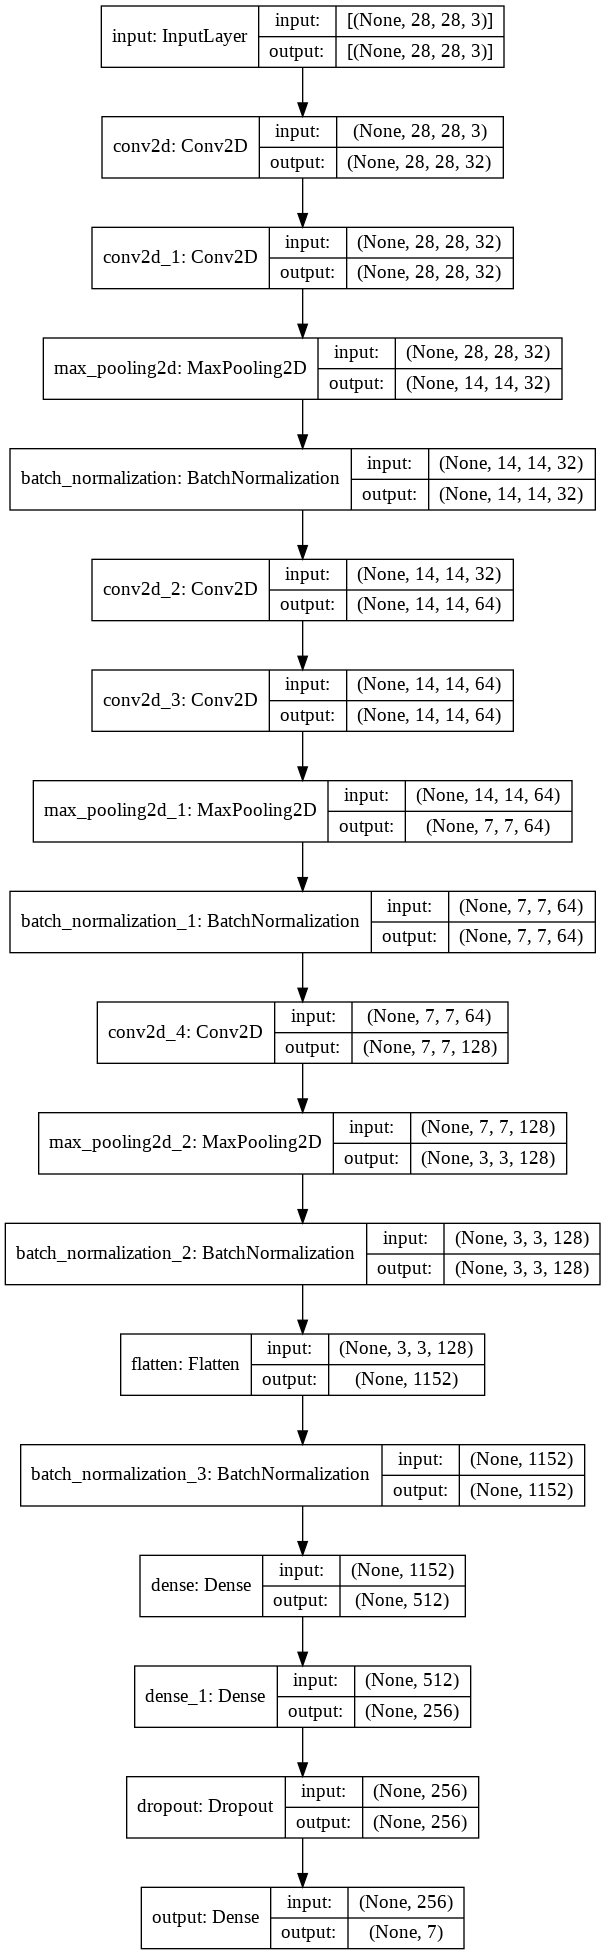

In [ ]:
plot_model(model, to_file='model_sequential.png', show_shapes=True, show_layer_names=True)

In [ ]:
# Define the optimizer
optimizer = Adam(learning_rate=0.0001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)

In [ ]:
# , shuffle = True
model.compile(optimizer= optimizer, loss= 'sparse_categorical_crossentropy', metrics=['accuracy'])
training = model.fit(x_train, y_train, epochs = 10, validation_data=(x_valid, y_valid),batch_size= 128,shuffle = True)

Epoch 1/10
221/221 [==============================] - 135s 608ms/step - loss: 1.0876 - accuracy: 0.6159 - val_loss: 1.1341 - val_accuracy: 0.5969
Epoch 2/10
221/221 [==============================] - 134s 606ms/step - loss: 0.5360 - accuracy: 0.8233 - val_loss: 0.4918 - val_accuracy: 0.8416
Epoch 3/10
221/221 [==============================] - 134s 606ms/step - loss: 0.3346 - accuracy: 0.8951 - val_loss: 0.2503 - val_accuracy: 0.9302
Epoch 4/10
221/221 [==============================] - 134s 606ms/step - loss: 0.2184 - accuracy: 0.9349 - val_loss: 0.2055 - val_accuracy: 0.9398
Epoch 5/10
221/221 [==============================] - 134s 606ms/step - loss: 0.1473 - accuracy: 0.9575 - val_loss: 0.1617 - val_accuracy: 0.9515
Epoch 6/10
221/221 [==============================] - 134s 605ms/step - loss: 0.1029 - accuracy: 0.9729 - val_loss: 0.1490 - val_accuracy: 0.9562
Epoch 7/10
221/221 [==============================] - 134s 606ms/step - loss: 0.0727 - accuracy: 0.9805 - val_loss: 0.1254 -

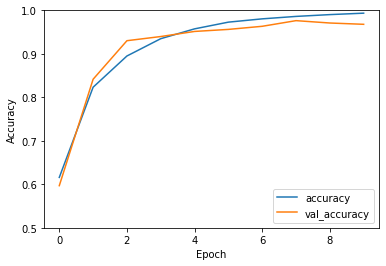

294/294 - 11s - loss: 0.1248 - accuracy: 0.9628


In [ ]:
plt.plot(training.history['accuracy'], label='accuracy')
plt.plot(training.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.show()

test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)

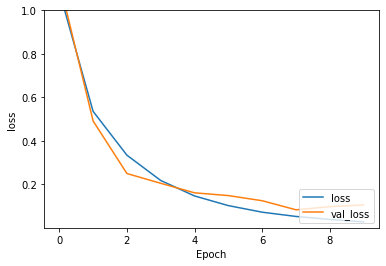

In [ ]:
plt.plot(training.history['loss'], label='loss')
plt.plot(training.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.ylim([0.001, 1])
plt.legend(loc='lower right')
plt.show()

In [ ]:
#model.save('gdrive/Shareddrives/FIT3163 - Group 6 Assignment/CNN/test10.h5')

In [ ]:
import tensorflow as tf
from tensorflow import keras
import PIL
import numpy as np

In [ ]:
classes = {0: ('akiec', 'Actinic keratoses and intraepithelial carcinomae'),  
           1:('bcc' , ' basal cell carcinoma'), 
           2 :('bkl', 'benign keratosis-like lesions'), 
           3: ('df', 'dermatofibroma'),
           4: ('nv', ' melanocytic nevi'),
           5: ('vasc', ' pyogenic granulomas and hemorrhage'), 
           6: ('mel', 'melanoma')}

In [ ]:
functional_model = tf.keras.models.load_model('gdrive/Shareddrives/FIT3163 - Group 6 Assignment/CNN/functional_correct.h5')

In [ ]:
image = PIL.Image.open('gdrive/Shareddrives/FIT3163 - Group 6 Assignment/CNN/ISIC_0032258.jpg')
image = image.convert("RGB")
image = image.resize((28,28))
img = np.array(image).reshape(-1,28,28,3)
result = functional_model.predict(img)

In [ ]:
print(class_label)

('mel', 'melanoma')


In [ ]:
max_prob = max(result[0])
class_ind = list(result[0]).index(max_prob)
class_label = classes[class_ind]
max_prob

0.9885479

In [ ]:
ISIC_0024312.jpg

In [ ]:
image = PIL.Image.open('gdrive/Shareddrives/FIT3163 - Group 6 Assignment/CNN/ISIC_0024306.jpg')
image = image.convert("RGB")
image = image.resize((28,28))
img = np.array(image).reshape(-1,28,28,3)
result = functional_model.predict(img)

In [ ]:
max_prob = max(result[0])
class_ind = list(result[0]).index(max_prob)
class_label = classes[class_ind]
max_prob

0.9999993

In [ ]:
print(class_label)

('nv', ' melanocytic nevi')
